In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

/Users/zhiduokatara/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## 1. Data Aggregation and Preprocessing

In [2]:
# List of the 20 subreddit names 
subreddits = [
    'dataisbeautiful', 'datascience', 'MachineLearning', 'statistics', 'bigdata',
    'datasciencejobs', 'datasets', 'artificial', 'deeplearning', 'machinelearningjobs',
    'dataengineering', 'learnmachinelearning', 'learnprogramming', 'dataanalysis',
    'dataviz', 'learnpython', 'python', 'learnsql', 'learnjavascript', 'programming'
]

# Initialize an empty list to store DataFrames
dataframes = []

# Loop through each subreddit, load its CSV file, add the subreddit column, and append to the list
for subreddit in subreddits:
    file_path = f"{subreddit}_20240415.csv"
    df = pd.read_csv(file_path)
    df['subreddit'] = subreddit  # Add a column indicating the subreddit
    dataframes.append(df)

# Combine all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)
print(combined_df.head())

# Save the combined DataFrame to a new CSV file
combined_df.to_csv("combined.csv", index=False)


       id                                              title selftext   score  \
0  hs9mnz  [OC] Trending Google Searches by State Between...      NaN  162707   
1  i9ljw9  I analysed 70 years of baby names in the US to...      NaN  122729   
2  fxucds  For everyone asking why i didn't include the S...      NaN  120978   
3  b5f9wi  Let's hear it for the lurkers! The vast majori...      NaN  111353   
4  hni7zy  US College Tuition & Fees vs. Overall Inflatio...      NaN  109991   

   num_comments       author          created_utc  \
0          7649  V1Analytics  2020-07-16 13:27:25   
1          3893      nathcun  2020-08-14 13:03:03   
2          3120  harry29ford  2020-04-09 15:24:20   
3          4682    TrueBirch  2019-03-25 19:37:10   
4          5109       chartr  2020-07-08 14:40:07   

                                   url  gilded        subreddit  
0      https://v.redd.it/l0rvdugoy7b51      15  dataisbeautiful  
1  https://i.redd.it/eukx9llouyg51.png       3  dataisbeautifu

In [3]:
# load the combined csv file
df = pd.read_csv('combined.csv')

# print the shape of the dataframe
print(f"The combined dataframe has {df.shape[0]} rows and {df.shape[1]} columns.")

# count the number of posts in each subreddit
print(df['subreddit'].value_counts())

The combined dataframe has 19416 rows and 10 columns.
subreddit
statistics              1000
datasets                1000
artificial              1000
deeplearning            1000
dataanalysis            1000
dataengineering          999
bigdata                  999
learnsql                 999
learnpython              997
MachineLearning          996
learnjavascript          996
learnprogramming         995
dataisbeautiful          995
python                   992
learnmachinelearning     990
datascience              989
machinelearningjobs      982
programming              970
datasciencejobs          961
dataviz                  556
Name: count, dtype: int64


In [4]:
# Function to clean text
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove user handles
    text = re.sub(r'@\w+', '', text)
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply cleaning function to post titles
df['cleaned_title'] = df['title'].apply(clean_text)


In [5]:
# Function to remove stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Apply the remove_stopwords function
df['cleaned_title'] = df['cleaned_title'].apply(remove_stopwords)

# Display the head of the DataFrame to check cleaned titles
print(df[['title', 'cleaned_title']].head())

                                               title  \
0  [OC] Trending Google Searches by State Between...   
1  I analysed 70 years of baby names in the US to...   
2  For everyone asking why i didn't include the S...   
3  Let's hear it for the lurkers! The vast majori...   
4  US College Tuition & Fees vs. Overall Inflatio...   

                                       cleaned_title  
0                  oc trending google searches state  
1  analysed years baby names us decide call male ...  
2  everyone asking didnt include spanish flu plag...  
3  lets hear lurkers vast majority reddit users d...  
4    us college tuition fees vs overall inflation oc  


## 2. Sentiment Analysis:

We calculated the sentiment scores of each post using VADER (Valence Aware Dictionary and sEntiment Reasoner). VADER is specifically tuned to sentiments expressed in social media and provides a compound score that summarizes the overall sentiment of a given text. 

Interpreting the Compound Score:<br>
[-1.0 to -0.5]: Strongly negative<br>
[-0.5 to -0.1]: Somewhat negative<br>
[-0.1 to 0.1]: Neutral / no emotional content<br>
[0.1 to 0.5]: Somewhat positive<br>
[0.5 to 1.0]: Strongly positive

In [6]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment(text):
    sentiment_score = sia.polarity_scores(text)
    return sentiment_score

# Apply the function to get sentiment scores
df['sentiment'] = df['cleaned_title'].apply(lambda x: get_sentiment(x)['compound'])

# Display sentiment scores
print(df[['cleaned_title', 'sentiment']].head())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/zhiduokatara/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                       cleaned_title  sentiment
0                  oc trending google searches state     0.0000
1  analysed years baby names us decide call male ...     0.0000
2  everyone asking didnt include spanish flu plag...     0.2924
3  lets hear lurkers vast majority reddit users d...     0.0000
4    us college tuition fees vs overall inflation oc     0.0000


score_category
Neutral              10706
Somewhat positive     3936
Strongly positive     2485
Somewhat negative     1581
Strongly negative      708
Name: count, dtype: int64


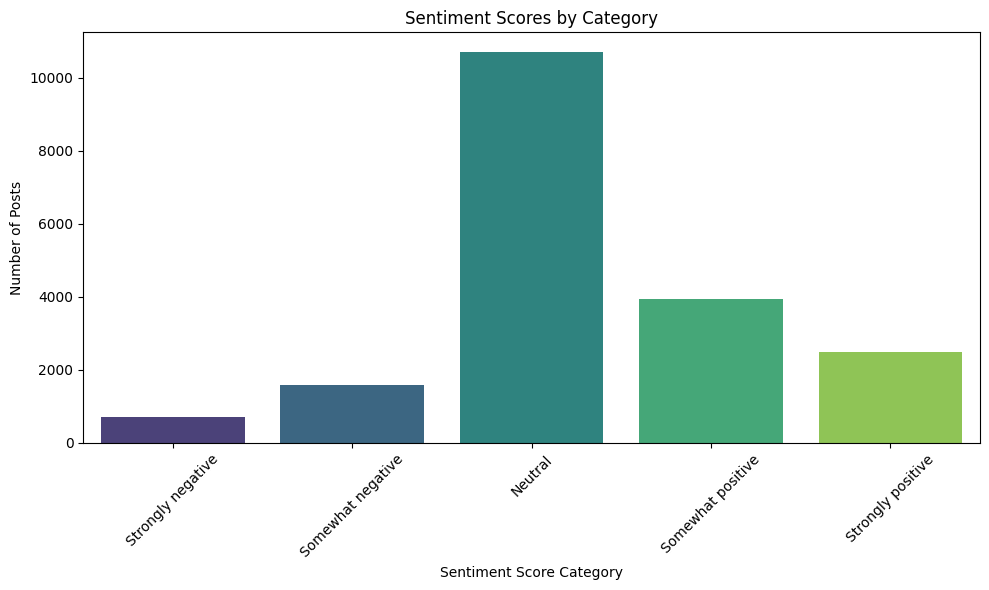

In [7]:
bins = [-1.0, -0.5, -0.1, 0.1, 0.5, 1.0]
labels = ['Strongly negative', 'Somewhat negative', 'Neutral', 'Somewhat positive', 'Strongly positive']
df['score_category'] = pd.cut(df['sentiment'], bins=bins, labels=labels)
print(df['score_category'].value_counts())

# visualize the sentiment scores by category:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='score_category', palette='viridis')
plt.title('Sentiment Scores by Category')
plt.xlabel('Sentiment Score Category')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Sentiment Analysis Across 20 Data-Related Subreddits:

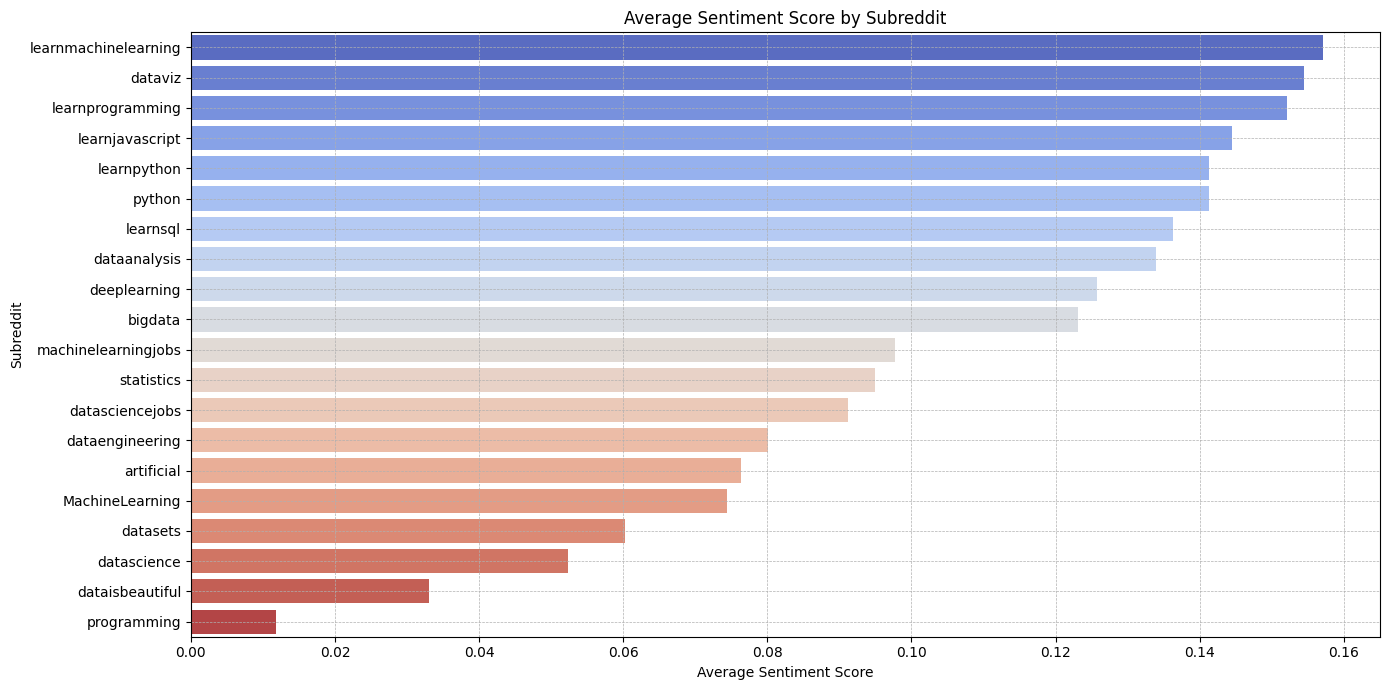

In [8]:
# Step 1: Calculate Average Sentiment by Subreddit
average_sentiment_by_subreddit = df.groupby('subreddit')['sentiment'].mean().reset_index()

# Step 2: Visualization
plt.figure(figsize=(14, 7))
sns.barplot(x='sentiment', y='subreddit', data=average_sentiment_by_subreddit.sort_values(by='sentiment', ascending=False),
            palette='coolwarm')
plt.title('Average Sentiment Score by Subreddit')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Subreddit')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Display the plot
plt.show()

In [9]:
#show the average sentiment by subreddit in descending order
print(average_sentiment_by_subreddit.sort_values(by='sentiment', ascending=False))

               subreddit  sentiment
12  learnmachinelearning   0.157160
9                dataviz   0.154474
13      learnprogramming   0.152065
11       learnjavascript   0.144427
14           learnpython   0.141341
18                python   0.141306
15              learnsql   0.136239
3           dataanalysis   0.133918
10          deeplearning   0.125798
2                bigdata   0.123058
16   machinelearningjobs   0.097770
19            statistics   0.094994
7        datasciencejobs   0.091176
4        dataengineering   0.080151
1             artificial   0.076344
0        MachineLearning   0.074460
8               datasets   0.060209
6            datascience   0.052265
5        dataisbeautiful   0.033076
17           programming   0.011826


#### Our Key Findings
The sentiment analysis across different data-related subreddits reveals the general emotional tone and atmosphere within these communities, influenced by the nature of content and user interactions.

- **Highly Positive Sentiment**: 
  - **learnmachinelearning (0.157)**, **dataviz (0.154)**, and **learnprogramming (0.152)** demonstrate the highest average sentiment scores, indicating positive engagement likely driven by educational content and supportive interactions.
  - **learnjavascript (0.144)** and **learnpython (0.141)** also show strong positive sentiments, reflecting the encouraging nature of these learning-focused communities.

- **Moderate Positive Sentiment**: 
  - **deeplearning (0.126)** and **dataanalysis (0.134)**: These scores suggest constructive discussions typically around technical breakthroughs and successful projects.

- **Lower Positive Sentiment**:
  - **MachineLearning (0.074)** and **artificial (0.076)**: Slightly lower positive sentiments in these forums could be due to the critical and complex discussions that don’t always yield straightforward positive outcomes.
  - **datascience (0.052)**: The critical nature of discussions and the complexity of topics in this community contribute to its lower sentiment score.

- **Lowest Sentiment**:
  - **programming (0.012)**: Exhibits the lowest sentiment score, possibly reflecting the frustrations and challenges inherent in programming tasks and debug sessions.

#### Interpretation
- Subreddits focused on learning and sharing educational content generally exhibit higher positive sentiments.
- Technical and problem-solving discussions in subreddits like programming and MachineLearning can lead to lower sentiment scores due to the potentially frustrating nature of the topics discussed.

#### Conclusion
This sentiment analysis highlights how the focus of a subreddit—whether educational, technical, or professional—significantly influences the emotional tone of the discussions within. Educational and learner-centric subreddits tend to foster a positive atmosphere, while technical discussions may have a mixed impact on sentiment due to the challenging nature of the content.


In [10]:
df.head()

,id,title,selftext,score,num_comments,author,created_utc,url,gilded,subreddit,cleaned_title,sentiment,score_category
0,hs9mnz,[OC] Trending Google Searches by State Between...,NaN,162707,7649,V1Analytics,2020-07-16 13:27:25,https://v.redd.it/l0rvdugoy7b51,15,dataisbeautiful,oc trending google searches state,0.0000,Neutral
1,i9ljw9,I analysed 70 years of baby names in the US to...,NaN,122729,3893,nathcun,2020-08-14 13:03:03,https://i.redd.it/eukx9llouyg51.png,3,dataisbeautiful,analysed years baby names us decide call male ...,0.0000,Neutral
2,fxucds,For everyone asking why i didn't include the S...,NaN,120978,3120,harry29ford,2020-04-09 15:24:20,https://v.redd.it/nttldl0c8tr41,3,dataisbeautiful,everyone asking didnt include spanish flu plag...,0.2924,Somewhat positive
3,b5f9wi,Let's hear it for the lurkers! The vast majori...,NaN,111353,4682,TrueBirch,2019-03-25 19:37:10,https://i.redd.it/2731jdr3ibo21.png,1,dataisbeautiful,lets hear lurkers vast majority reddit users d...,0.0000,Neutral
4,hni7zy,US College Tuition & Fees vs. Overall Inflatio...,NaN,109991,5109,chartr,2020-07-08 14:40:07,https://i.redd.it/xcdto6rnan951.jpg,0,dataisbeautiful,us college tuition fees vs overall inflation oc,0.0000,Neutral


In [11]:
# count the number of nan values in the selftext column
print(df['selftext'].isnull().sum())

10306


## 3. Analysis of Engagement Metrics by Sentiment Category: 
Correlation analysis between sentiment scores and engagement metrics

Average engagement metrics by sentiment category:
      score_category  num_comments        score
0  Strongly negative    382.192090  4910.891243
1  Somewhat negative    214.194813  2761.843137
2            Neutral    169.446198  2860.143751
3  Somewhat positive    162.024898  2395.211128
4  Strongly positive    119.883702  1556.600402
Correlation matrix:
                num_comments     score  sentiment_code
num_comments        1.000000  0.974340       -0.892834
score               0.974340  1.000000       -0.904123
sentiment_code     -0.892834 -0.904123        1.000000


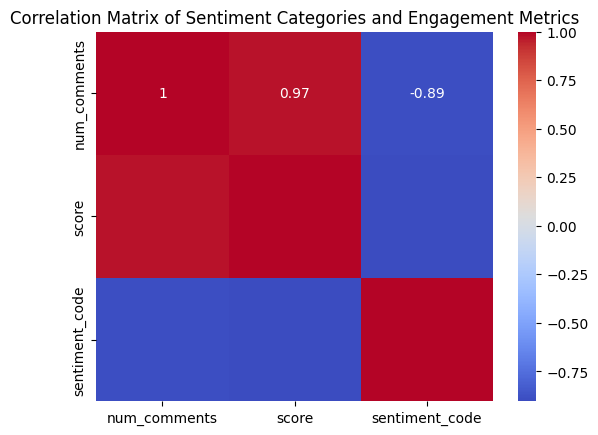

In [12]:

# Step 1: Aggregate Engagement Metrics by Sentiment Category
engagement_by_sentiment = df.groupby('score_category').agg({
    'num_comments': 'mean',  # Average number of comments per sentiment category
    'score': 'mean'          # Average score (upvotes minus downvotes) per sentiment category
}).reset_index()

print("Average engagement metrics by sentiment category:")
print(engagement_by_sentiment)

# Step 2: Correlation Analysis
# For demonstration, convert sentiment categories to numeric codes to calculate correlation
engagement_by_sentiment['sentiment_code'] = engagement_by_sentiment['score_category'].astype('category').cat.codes

# Calculate correlation matrix
correlation_matrix = engagement_by_sentiment[['num_comments', 'score', 'sentiment_code']].corr()

print("Correlation matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Sentiment Categories and Engagement Metrics')
plt.show()


#### Our Key Findings:

- **Engagement by Sentiment Category**:
  - **Strongly Negative**: Posts classified as strongly negative show the highest levels of engagement with an average of **382.19 comments** and a **score of 4910.89**.
  - **Somewhat Negative**: These posts also demonstrate significant engagement, with an average of **214.19 comments** and a **score of 2761.84**.
  - **Neutral**: Posts with neutral sentiment receive an average of **169.45 comments** and a **score of 2860.14**.
  - **Somewhat Positive**: These posts see slightly fewer interactions, with **162.02 comments** and a **score of 2395.21**.
  - **Strongly Positive**: Strongly positive posts attract the least interaction, averaging **119.88 comments** and a **score of 1556.60**.

#### Correlation Analysis:
- A **high positive correlation (0.974)** between `num_comments` and `score` suggests that posts with higher scores tend to have more comments. This strong link indicates that engagement in terms of score is a robust predictor of comment activity.
- **Negative correlations (-0.893 for comments and -0.904 for scores)** with `sentiment_code` indicate that more negatively perceived posts garner significantly more engagement. This pattern suggests that negative content tends to provoke more user reactions.

#### Interpretation:
- **Impact of Negative Sentiment**: The data highlight a trend where negative sentiments are major drivers of engagement. This could be due to the provocative nature of such content, which may incite more reactions from the community.
- **Neutral and Positive Posts**: While neutral posts receive moderate engagement, the reduced interaction with positive content, especially highly positive, poses a challenge in fostering interactions on positive posts.
- **Engagement Dynamics**: The correlation between engagement metrics confirms that popular posts (those with higher scores) also tend to receive more comments, reinforcing the visibility-engagement cycle.

#### Conclusion:
These insights have implications for content strategies on platforms like Reddit, where understanding user engagement dynamics can aid in crafting content that aligns with desired interactions. For community managers and content creators, this knowledge is valuable for promoting and managing discussions in line with subreddit goals or broader community engagement strategies.


## 4. Topic Modeling: using LDA model

In [13]:
import gensim
from gensim import corpora
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

nltk.download('stopwords')
nltk.download('punkt')

# lda_display = gensimvis.prepare(lda_model, corpus, dictionary, mds='mmds')  # 'mmds' or 'tsne' might work better for single-threaded operations
# pyLDAvis.display(lda_display)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhiduokatara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/zhiduokatara/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
# Step 1: Prepare the data
# Tokenize the data
texts = df['cleaned_title'].apply(lambda x: word_tokenize(x.lower()))

# Remove stopwords
stop_words = set(stopwords.words('english'))
texts = texts.apply(lambda x: [word for word in x if word not in stop_words])

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(texts)
# Filter out extremes to limit the number of features
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=100000)

# Convert dictionary to a bag of words corpus
corpus = [dictionary.doc2bow(text) for text in texts]

# Step 2: Train the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15, random_state=100)

# Step 3: Analyze the Topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

# Step 4: Visualization using pyLDAvis
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

(0, '0.035*"using" + 0.035*"made" + 0.032*"python" + 0.020*"game" + 0.019*"app"')
(1, '0.224*"data" + 0.035*"science" + 0.028*"analyst" + 0.024*"hiring" + 0.020*"scientist"')
(2, '0.052*"web" + 0.032*"vs" + 0.030*"youtube" + 0.019*"books" + 0.018*"linux"')
(3, '0.025*"use" + 0.024*"open" + 0.024*"ai" + 0.017*"like" + 0.017*"source"')
(4, '0.021*"need" + 0.021*"know" + 0.019*"years" + 0.016*"big" + 0.015*"way"')
(5, '0.035*"google" + 0.023*"build" + 0.021*"online" + 0.016*"computer" + 0.015*"developers"')
(6, '0.058*"python" + 0.045*"sql" + 0.037*"learn" + 0.034*"learning" + 0.033*"javascript"')
(7, '0.063*"first" + 0.043*"project" + 0.021*"oc" + 0.017*"stuff" + 0.015*"year"')
(8, '0.041*"programming" + 0.036*"code" + 0.021*"using" + 0.019*"python" + 0.017*"remote"')
(9, '0.075*"learning" + 0.061*"machine" + 0.042*"job" + 0.040*"engineer" + 0.032*"software"')


/Users/zhiduokatara/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/zhiduokatara/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/zhiduokatara/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/zhiduokatara/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/zhiduokatara/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked

 ### Insights from Topic Distributions Across Data-Related Subreddits

1. **Development and Applications (Topics 0 & 5)**:
   - **Subreddits**: `programming`, `python`, `learnprogramming`
   - **Focus**: Application development and technological tool-building with an emphasis on Python and Google tools. These topics indicate a hands-on approach to learning and applying programming skills in practical projects.

2. **Career and Educational Pathways (Topics 1 & 6)**:
   - **Subreddits**: `datascience`, `MachineLearning`, `learnmachinelearning`
   - **Focus**: Career development, job opportunities in data science, and learning essential programming languages. These discussions are crucial for those looking to advance professionally in data science and machine learning.

3. **Resource Sharing and Educational Content (Topic 2)**:
   - **Subreddits**: `learnjavascript`, `learnpython`
   - **Focus**: Sharing of educational resources like books and online tutorials, especially YouTube videos. This topic highlights the community’s commitment to self-improvement and resource sharing.

4. **Open Source and Innovation (Topics 3 & 8)**:
   - **Subreddits**: `artificial`, `opensource`
   - **Focus**: Discussions around open-source projects, AI, and advanced programming techniques, reflecting a deep interest in leveraging open technologies for innovative solutions.

5. **General Advice and Community Interaction (Topics 4 & 7)**:
   - **Subreddits**: `learnprogramming`, `programming`
   - **Focus**: General advice, sharing of personal projects and first tech experiences. These topics underscore the community’s supportive nature and its role in fostering personal growth.

6. **Machine Learning and Professional Development (Topic 9)**:
   - **Subreddits**: `MachineLearning`, `dataengineering`
   - **Focus**: Professional roles and discussions on machine learning and software engineering. This topic is indicative of a highly specialized audience focused on the cutting edge of technology.

### Conclusion

The insights from LDA topic modeling highlight a community that is diverse in skill levels but unified in its pursuit of technological proficiency and professional development. The findings from these topics can help in tailoring content to better serve user interests and support community growth by aligning resources and discussions with the users' professional aspirations and educational needs.


In [24]:
# Calculate mean sentiment for each user
# count the number of unique authors
print(df['author'].nunique())
# show the number of posts by each author, that are more than 1
author_counts = df['author'].value_counts()
more_than_one_post = author_counts[author_counts >= 1]
print(more_than_one_post)

# print(df['author'].value_counts())


# user_sentiments = df.groupby('author')['sentiment'].mean().reset_index()
# user_sentiments 
# df.shape

11494
author
ai_jobs             747
cavedave            134
remoteimpactjobs    106
golangprojects       85
cmillionaire9        80
                   ... 
thedankzone           1
arcotime29            1
ytcoinartist          1
jamesj                1
b0red                 1
Name: count, Length: 11494, dtype: int64


In [16]:
# Calculate mean sentiment for each user
user_sentiments = df.groupby('author')['sentiment'].mean().reset_index()

# Calculate the total number of comments made by each user
user_comments = df.groupby('author')['num_comments'].sum().reset_index()

# Merge to create a basic user profile
user_profiles = pd.merge(user_sentiments, user_comments, on='author')
user_profiles

,author,sentiment,num_comments
0,--CreativeUsername,0.000000,60
1,--Explosion--,0.000000,17
2,-Alchem1st-,0.796400,25
3,-BlackSquirrel-,0.255300,91
4,-Montse-,0.316125,1264
...,...,...,...
11489,zvone187,0.000000,911
11490,zxf520,0.000000,59
11491,zxxx,0.000000,18
11492,zxyzyxz,0.000000,478


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Create a TF-IDF matrix of post titles and selftext
tfidf_vect = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = tfidf_vect.fit_transform(df['title'] + " " + df['selftext'])

# Fit LDA to find topics
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(dtm)

# Get the dominant topic for each post
topic_results = lda.transform(dtm)
df['dominant_topic'] = topic_results.argmax(axis=1)

# Associate users with topics based on their posts
user_topics = df.groupby('author')['dominant_topic'].agg(lambda x: pd.Series.mode(x)[0]).reset_index()

# Merge topics into user profiles
user_profiles = pd.merge(user_profiles, user_topics, on='author')


ValueError: np.nan is an invalid document, expected byte or unicode string.